In [2]:
import torch.nn as nn
from gensim.models import KeyedVectors
import warnings
import numpy as np
import matplotlib.pyplot as plt
import re
import jieba
from sklearn.utils import shuffle
import pandas as pd

In [3]:
modelvec = KeyedVectors.load_word2vec_format('sgns.weibo.bigram', 
                                          binary=False)


In [4]:
embedding_dim = modelvec['山东大学'].shape[0]

In [5]:
embedding_dim

300

In [6]:
df = pd.read_csv('/home/aurelian/codes/Github/Nijigen_saikou/datasets/simplifyweibo_4_moods.csv',encoding="utf8")

In [7]:
df['label'].value_counts()

label
0    199496
2     55267
3     55267
1     51714
Name: count, dtype: int64

In [8]:
su = 0
for row in df.itertuples():
    if getattr(row,'label') == 0:
        su +=1;


In [9]:
su

199496

In [10]:
df = shuffle(df)

In [11]:
df

,label,review
175631,0,量不错啊。。。微薄广告的性价比太高了，几千块广告投入能覆盖到几万用户，我还真在乐淘上面逛了十...
72148,0,表情帝。。。。。
123723,0,这么多关于iphone4 的优点看来我这2代该扔了，放假就换[迫不及待]    
86605,0,没有看过，希望能有机会看看【北京欢乐谷抢票活动】送夜场魔幻嘉年华。成为粉丝并此条微博，3个以...
108810,0,欢迎每位来咱们教室的大朋友和小朋友们都做好、吃好、玩儿好！老早就是大头的粉丝了可是这里还是第...
...,...,...
166307,0,哈哈。【夫妻吵架公约】1、吵架时要注意经济，要出气不能乱摔东西，只能砸枕头。2、吵架时不能提...
223793,1,政府官员酒后暴打两名服务员，荒谬和丑陋的现实现在只盼着2012的到来，把所有的不公平的事和人...
329585,3,太感人鸟~ 内牛满面啊简直了~ 3Q 相互兼容了，感谢政府。
126393,0,毕业照的时候，我也要拍这个。。【雷人】换个视角看世界，是不是觉得很有意思呢？


In [12]:
corpus = df["review"].tolist()
label = df["label"].tolist()

In [20]:
flag = 0.2

72348.8

In [24]:
train_tokens = []
for text in corpus:
    # 去掉标点
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "",text)
    # 结巴分词
    cut = jieba.cut(text)
    # 结巴分词的输出结果为一个生成器
    # 把生成器转换为list
    cut_list = [ i for i in cut ]
    for i, word in enumerate(cut_list):
        try:
            # 将词转换为索引index
            cut_list[i] = modelvec.key_to_index[word]
        except KeyError:
            # 如果词不在字典中，则输出0
            cut_list[i] = 0
    train_tokens.append(cut_list)


In [29]:
train_tokens

[[2381,
  245,
  31,
  3633,
  743,
  1,
  4873,
  7101,
  5,
  0,
  743,
  2556,
  53,
  3781,
  62,
  0,
  660,
  14,
  38,
  242,
  13,
  914,
  4662,
  2441,
  2068,
  5,
  0,
  1034,
  24,
  8,
  13,
  12356,
  49558,
  1,
  1482,
  1,
  1014,
  67831,
  247,
  1850,
  451,
  13,
  1482,
  0,
  5,
  0,
  4662,
  22438,
  431,
  1,
  4037,
  2381,
  641,
  51626,
  67,
  316,
  5522,
  1,
  189,
  122,
  140,
  152,
  7011,
  243,
  393,
  187453,
  436,
  1482,
  1,
  5522,
  94,
  10,
  399,
  297,
  0,
  4662,
  1987,
  1,
  0,
  0,
  45354,
  344,
  914,
  4662,
  3911,
  431],
 [1733, 5107],
 [167,
  69,
  911,
  0,
  1,
  7136,
  844,
  14,
  32,
  85,
  0,
  4116,
  5,
  2714,
  23,
  783,
  74,
  10709,
  77,
  0,
  0,
  0,
  0,
  0],
 [84,
  1746,
  191,
  53,
  10,
  294,
  271,
  80,
  72,
  12277,
  0,
  135,
  11,
  297,
  28156,
  10609,
  6601,
  279,
  476,
  227,
  11237,
  41,
  99,
  17,
  1112,
  635,
  873,
  14744,
  230,
  1386,
  1768,
  23,
  10,
  294,
  3

In [25]:
num_tokens = [ len(tokens) for tokens in train_tokens ]
num_tokens = np.array(num_tokens)

In [27]:
np.mean(num_tokens)

35.479665177584145

In [28]:
np.max(num_tokens)

220

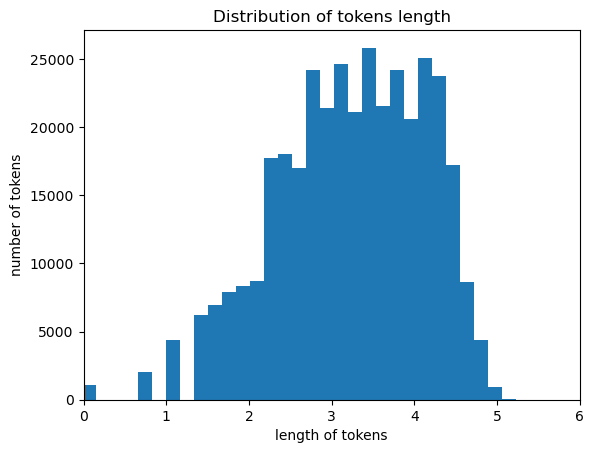

In [33]:

plt.hist(np.log(num_tokens+ 1e-5), bins = 100)
plt.xlim((0,6))
plt.ylabel('number of tokens')
plt.xlabel('length of tokens')
plt.title('Distribution of tokens length')
plt.show()

In [50]:
def reverse_tokens(tokens):
    text = ''
    for i in tokens:
        if i != 0:
            text = text + modelvec.index_to_key[i]
        else:
            text = text + ' '
    return text

In [51]:


reverse = reverse_tokens(train_tokens[0])



In [52]:
reverse

'量不错啊微薄广告的性价比太高了 广告投入能覆盖到 用户我还真在乐淘上面逛了 以前都是在凡客买鞋的围脖的力量无穷大呀昨日刚刚在围脖 了 淘Iphone版的安装量居然暴增为感谢博友的支持从现在开始72小时内专发此围脖的博友将有可能送 淘赠送的  预装免费乐淘iphone版'

In [53]:
len(train_tokens)

361744

In [54]:
type(train_tokens)

list

In [56]:
def pad_input(tokens,length):
    features = np.zeros((len(tokens),length),dtype=int)
    for ii,review in enumerate(tokens):
        if len(review) != 0:
            features[ii,-len(review):] = np.array(review)[:length]
    return features


In [59]:
data = pad_input(train_tokens,220)

In [60]:
data

array([[   0,    0,    0, ..., 4662, 3911,  431],
       [   0,    0,    0, ...,    0, 1733, 5107],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    5,  316,  880],
       [   0,    0,    0, ...,    0, 1173,   98],
       [   0,    0,    0, ...,    0, 1391,    5]])

In [65]:
label = np.array(label)

In [66]:
label

array([0, 0, 0, ..., 3, 0, 0])

In [76]:
import torch
from torch.utils.data import random_split
from torch.utils.data import TensorDataset,DataLoader
import torch.nn as nn

In [79]:
batch_size = 200

In [70]:
data = TensorDataset(torch.from_numpy(data),torch.from_numpy(label))

In [74]:
ratio=0.8
train_size = int(ratio*len(train_tokens))
test_size = len(train_tokens) - train_size

In [78]:
train_dataset,test_dataset = random_split(data,[train_size,test_size])

In [81]:
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_dataset, shuffle=True, batch_size=batch_size)

In [83]:
device = torch.device('cuda')

In [84]:
class LSTMNet(nn.Module):
    def __init__(self,vocab_size):
        super(LSTMNet,self).__init__()
        self.n_layers = n_layers = 2
        self.hidden_dim = hidden_dim = 512
        embedding_dim = 400
        drop_prob = 0.5
        
        self.embedding = nn.Embedding(vocab.size,embedding_dim)
        
        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            n_layers,
                            dropout = drop_prob,
                            batch_fierst = True)
        
        self.fc = nn.Linear(in_features=hidden_dim,
                            out_featers = 1
                           )
        self.sigmoid = nn.Sigmoid()
        
        self.dropout = nn.Dropout(drop_prob)
        
    def forward(self,x,hidden):
        batch_size = x.size(0)
        x=x.long()
        embeds = self.embedding(x)
        lstm_out = lstm_out.contiguous()

IndentationError: expected an indented block (1091444488.py, line 2)